# Correlations emerging from group differences

Import python modules

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scistats

---
Let's assume that we have two variables, **a** and **b**, and four experimental groups. The variables **a** and **b** have different means in the different experimental groups, for some unknown reason.

In [2]:
n_groups = 4
variable_a_means = [3,4,5,6]
variable_b_means = [6,7,8,9]

Let's for simplicity assume that the standard deviations of the distributions of variable **a** and **b** are all the same.

In [3]:
var_a_b_std = 2.0

---
When we do an experiment and measure say 100 data points per experimental group, we get four data sets containing a 100 measurements of **a** and **b**

In [4]:
n = 100
variable_a_measurements = []
variable_b_measurements = []

In [5]:
for g in range(n_groups):
    variable_a_measurements.append(np.random.normal(loc=variable_a_means[g], scale=var_a_b_std, size=(n,)))
    variable_b_measurements.append(np.random.normal(loc=variable_b_means[g], scale=var_a_b_std, size=(n,)))

---
Now, let's have a look at each of the experimental groups separately

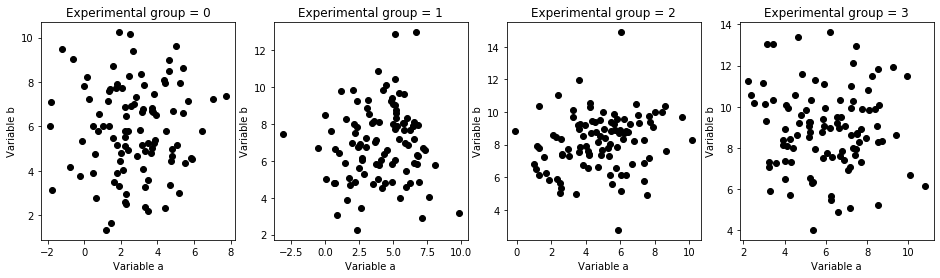

In [6]:
plt.figure(figsize=(16,int(np.ceil(n_groups/4))*4), facecolor='w', edgecolor='w')
for g in range(n_groups):
    ax = plt.subplot2grid( (int(np.ceil(n_groups/4)),4), (int(np.floor(g/4)),int(np.mod(g,4))) )
    plt.plot(variable_a_measurements[g],variable_b_measurements[g],'ok')
    plt.title("Experimental group = {}".format(g))
    plt.xlabel("Variable a")
    plt.ylabel("Variable b")
plt.show()

These randomly sampled variables are clearly not correlated, as one can also see from the plots above .. and from the correlations below

In [7]:
print("\nCorrelation of variables a and b:")
for g in range(n_groups):
    r,p = scistats.pearsonr(variable_a_measurements[g],variable_b_measurements[g])
    print(" - Group {}: r={:>6.3f}, p={:0.3f}".format(g,r,p))


Correlation of variables a and b:
 - Group 0: r= 0.034, p=0.738
 - Group 1: r= 0.051, p=0.615
 - Group 2: r= 0.183, p=0.068
 - Group 3: r=-0.055, p=0.584


---
However, let's now make one plot of all data

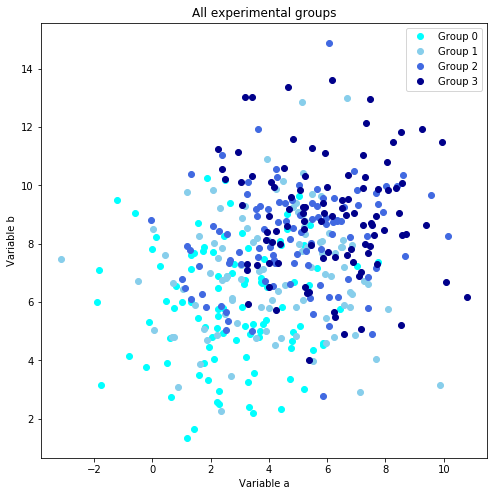

In [8]:
group_colors = ['aqua','skyblue','royalblue','darkblue']
plt.figure(figsize=(8,8), facecolor='w', edgecolor='w')
for g in range(n_groups):
    plt.plot(variable_a_measurements[g],variable_b_measurements[g],'o', 
             color=group_colors[g], label="Group {}".format(g))
plt.title("All experimental groups")
plt.xlabel("Variable a")
plt.ylabel("Variable b")
plt.legend()
plt.show()

If we combine all values across groups, we can again look at the correlation

In [9]:
combined_a_measurements = np.concatenate(variable_a_measurements,axis=0)
combined_b_measurements = np.concatenate(variable_b_measurements,axis=0)
print("\nCorrelation of variables a and b:")
r,p = scistats.pearsonr(combined_a_measurements,combined_b_measurements)
print(" - All groups combined {}: r={:>6.3f}, p={:0.3f}".format(g,r,p))


Correlation of variables a and b:
 - All groups combined 3: r= 0.293, p=0.000


Now it looks like there is a statistically significant correlation between **a** and **b**, which we know to be not true

---
A good way to correct for the group difference is to, either look at the relation between **a** and **b** in each experimental group individually (as we did above), or to first zscore the values of variable **a** and **b** per group (as we'll do below)

Let's zscore the data per group

In [10]:
zscored_a_measurements = []
zscored_b_measurements = []
for g in range(n_groups):
    zscored_a_measurements.append( (variable_a_measurements[g] - np.mean(variable_a_measurements[g]))
        / np.std(variable_a_measurements[g]) )
    zscored_b_measurements.append( (variable_b_measurements[g] - np.mean(variable_b_measurements[g])) \
        / np.std(variable_b_measurements[g]) )

Now compare the results with the original data

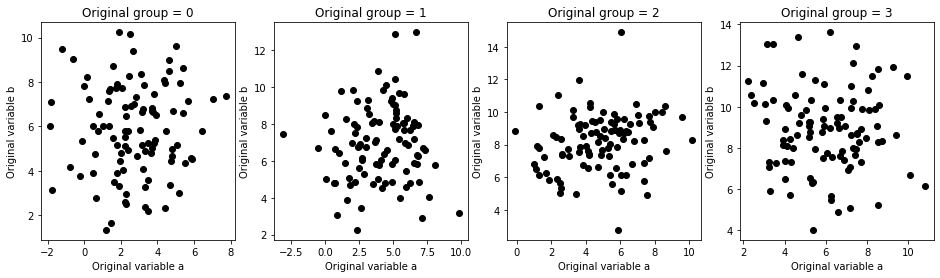

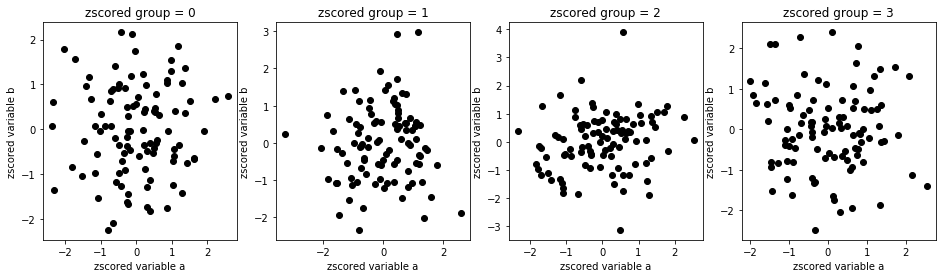

In [11]:
plt.figure(figsize=(16,int(np.ceil(n_groups/4))*4), facecolor='w', edgecolor='w')
for g in range(n_groups):
    ax = plt.subplot2grid( (int(np.ceil(n_groups/4)),4), (int(np.floor(g/4)),int(np.mod(g,4))) )
    plt.plot(variable_a_measurements[g],variable_b_measurements[g],'ok')
    plt.title("Original group = {}".format(g))
    plt.xlabel("Original variable a")
    plt.ylabel("Original variable b")
    
plt.figure(figsize=(16,int(np.ceil(n_groups/4))*4), facecolor='w', edgecolor='w')
for g in range(n_groups):
    ax = plt.subplot2grid( (int(np.ceil(n_groups/4)),4), (int(np.floor(g/4)),int(np.mod(g,4))) )
    plt.plot(zscored_a_measurements[g],zscored_b_measurements[g],'ok')
    plt.title("zscored group = {}".format(g))
    plt.xlabel("zscored variable a")
    plt.ylabel("zscored variable b")
    
plt.show()

In [12]:
print("\nCorrelation of variables a and b:")
for g in range(n_groups):
    r,p = scistats.pearsonr(variable_a_measurements[g],variable_b_measurements[g])
    print(" - Group {}, original: r={:>6.3f}, p={:0.3f}".format(g,r,p))
    r,p = scistats.pearsonr(zscored_a_measurements[g],zscored_b_measurements[g])
    print(" - Group {}, zscored : r={:>6.3f}, p={:0.3f}".format(g,r,p))


Correlation of variables a and b:
 - Group 0, original: r= 0.034, p=0.738
 - Group 0, zscored : r= 0.034, p=0.738
 - Group 1, original: r= 0.051, p=0.615
 - Group 1, zscored : r= 0.051, p=0.615
 - Group 2, original: r= 0.183, p=0.068
 - Group 2, zscored : r= 0.183, p=0.068
 - Group 3, original: r=-0.055, p=0.584
 - Group 3, zscored : r=-0.055, p=0.584


So, as we expected, zscoring did not change anything when looking _within_ each group

---
Finally, let's inspect what happens when we pool the zscored data versus the original data

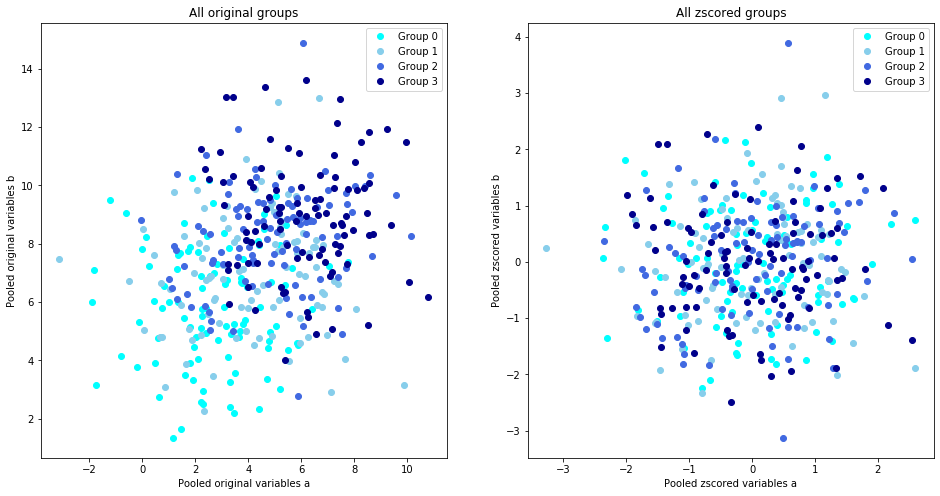

In [13]:
group_colors = ['aqua','skyblue','royalblue','darkblue']
plt.figure(figsize=(16,8), facecolor='w', edgecolor='w')
ax1 = plt.subplot2grid( (1,2), (0,0) )
for g in range(n_groups):
    plt.plot(variable_a_measurements[g],variable_b_measurements[g],'o', 
             color=group_colors[g], label="Group {}".format(g))
plt.title("All original groups")
plt.xlabel("Pooled original variables a")
plt.ylabel("Pooled original variables b")
plt.legend()

ax2 = plt.subplot2grid( (1,2), (0,1) )
for g in range(n_groups):
    plt.plot(zscored_a_measurements[g],zscored_b_measurements[g],'o', 
             color=group_colors[g], label="Group {}".format(g))
plt.title("All zscored groups")
plt.xlabel("Pooled zscored variables a")
plt.ylabel("Pooled zscored variables b")
plt.legend()

plt.show()

And calculate the correlation across all data points

In [14]:
print("\nCorrelation of pooled original variables a and b:")
r,p = scistats.pearsonr(combined_a_measurements,combined_b_measurements)
print(" - All groups combined {}: r={:>6.3f}, p={:0.3f}".format(g,r,p))

combined_a_zscores = np.concatenate(zscored_a_measurements,axis=0)
combined_b_zscores = np.concatenate(zscored_b_measurements,axis=0)
print("\nCorrelation of pooled zscored variables a and b:")
r,p = scistats.pearsonr(combined_a_zscores,combined_b_zscores)
print(" - All groups combined {}: r={:>6.3f}, p={:0.3f}".format(g,r,p))


Correlation of pooled original variables a and b:
 - All groups combined 3: r= 0.293, p=0.000

Correlation of pooled zscored variables a and b:
 - All groups combined 3: r= 0.053, p=0.289


The correlation between the pooled zscored variables is very low, as it should be, because a and b are both independent random variables. So our two variables are indeed not correlated, instead, the earlier observed spurious correlation was caused by a difference in group means.